## 데이터 전처리 연습 문제
타이타닉 데이터를 전처리하라. (titanic_train.csv)

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 미싱 데이터 처리

In [3]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
age_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
_age = titanic_df['Age'].values
age_imputer.fit(_age.reshape(-1, 1))
titanic_df['Age'] = age_imputer.transform(_age.reshape(-1, 1))
titanic_df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [5]:
embarked_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
_embarked = titanic_df['Embarked'].values
embarked_imputer.fit(_embarked.reshape(-1, 1))
titanic_df['Embarked'] = embarked_imputer.transform(_embarked.reshape(-1, 1))
titanic_df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
x_0 = titanic_df.drop(['PassengerId', 'Survived', 'Cabin', 
                     'Ticket', 'Name', 'Embarked', 'Sex'],
                    axis=1).values
y = titanic_df['Survived'].values
x_0.shape

(891, 5)

In [8]:
# Pclass, Age, SibSp, Parch, Fare 값의 스탠다드 스케일러 처리
titanic_sc = StandardScaler()
titanic_sc.fit(x_0)
x_0 = titanic_sc.transform(x_0)
x_0

array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724,  0.        ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.2846632 , -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.17706291, -0.4745452 , -0.47367361, -0.49237783]])

In [9]:
# 'Sex'
sex_le = LabelEncoder()
x_sex = sex_le.fit_transform(titanic_df['Sex'].values)
x_sex

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [10]:
# 'Embarked'
embarked_list = ['C', 'Q', 'S']
embarked_ohe = OneHotEncoder(categories=[embarked_list], handle_unknown='ignore')
x_embarked = embarked_ohe.fit_transform(titanic_df['Embarked'].values.reshape(-1,1)).toarray()
x_embarked

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [11]:
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 
           'Embarked_C', 'Embarked_Q', 'Embarked_S']
x = np.concatenate([x_0, x_sex.reshape(-1,1), x_embarked], axis=1)
preprocced_titanic_df = pd.DataFrame(x, columns=columns)

# 의사결정나무 알고리즘

## 필요한 라이브러리 임포트

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
iris_dt = load_iris()

train_x, test_x, train_y, test_y = train_test_split(iris_dt.data, iris_dt.target, 
                                                    test_size=0.2, random_state=0)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## 학습 후 결과 확인

In [15]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(train_x, train_y)
tree_clf.score(test_x, test_y)

1.0

## 의사결정나무 알고리즘 트리 그리기

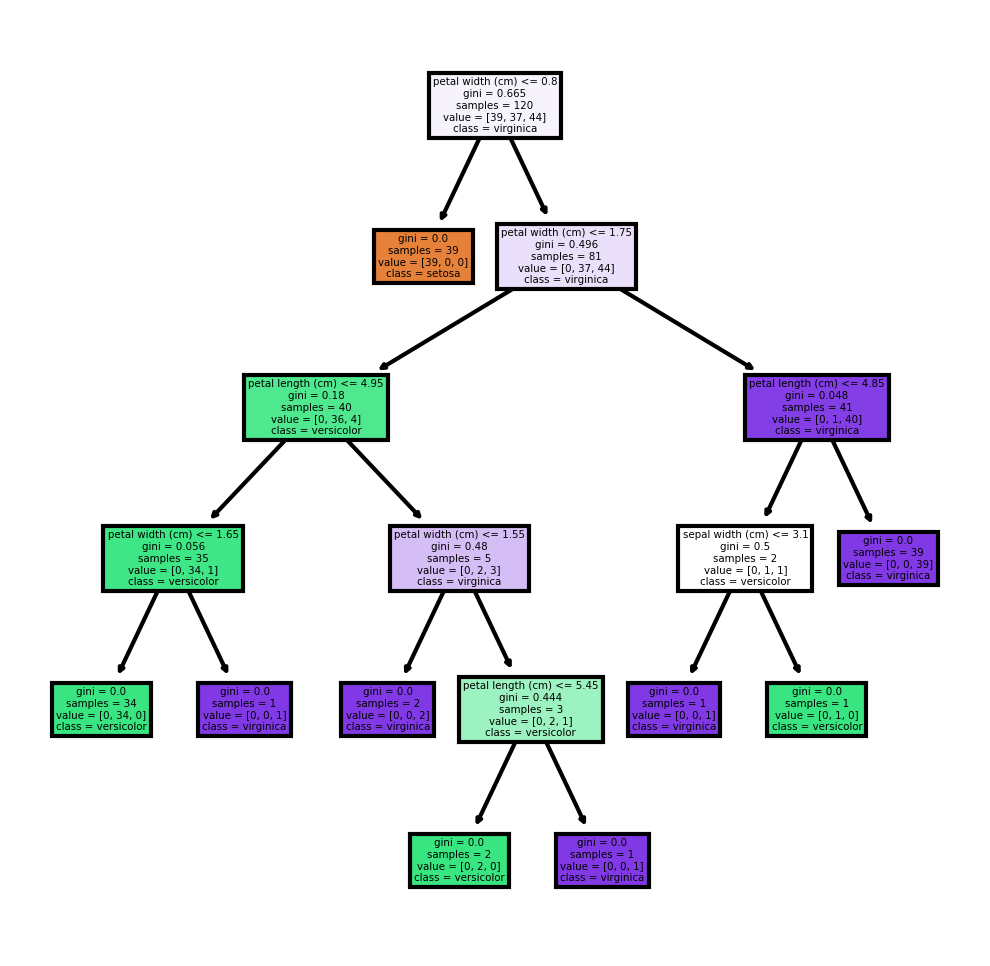

In [16]:
fn = iris_dt.feature_names # 각 특징의 이름
cn = iris_dt.target_names # 꽃의 이름

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300) # figure 모양을 설정
tree.plot_tree(tree_clf,
              feature_names=fn,
              class_names=cn,
              filled=True)

fig.savefig("tree.png")

## 중요도 확인하기

In [17]:
se0 = pd.Series(tree_clf.feature_importances_, index=fn)
se0

sepal length (cm)    0.000000
sepal width (cm)     0.012534
petal length (cm)    0.064446
petal width (cm)     0.923020
dtype: float64

<AxesSubplot:>

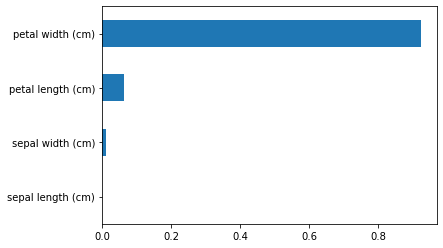

In [18]:
se0.plot(kind='barh')